In [1]:
import skimage
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import Progbar

In [3]:
print(tf.__version__)

2.17.0


In [4]:
import logging
import time
from tqdm.notebook import tqdm

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import shutil

In [6]:
from google.colab import files
files.upload()   # upload json api key

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullahshah0","key":"90bc0bf0869fb701e597b8b73cb502f4"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Download the dataset
!kaggle datasets download praveengovi/coronahack-chest-xraydataset

# Unzip all files
!unzip "/content/coronahack-chest-xraydataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0446-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0447-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0448-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0449-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0450-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0451-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0452-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001-0002.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack

# Data Preps

In [9]:
os.rename("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test", "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainO")
os.rename("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train", "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/extras")

In [10]:
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valO")
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN")
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO")
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN")
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN")

624 + 250 for training 250 for validation 100 for testing

In [11]:
source = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/extras/"
destVal = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valO"
destTest = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO"
destTrain = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainO"

In [12]:
def moveData(src,dest,nos):
  for no,i in enumerate(os.listdir(src)):
    if no==nos:
      break
    shutil.move(src+i,dest+"/"+i)

In [13]:
moveData(source,destTrain,400)
moveData(source,destVal,300)
moveData(source,destTest,200)

In [14]:
print(len(os.listdir(destTrain)))
print(len(os.listdir(destVal)))
print(len(os.listdir(destTest)))

1024
300
200


# Data Processing

Image Processed and Gaussian White Noise is added.

In [15]:
def processData(path,noisyDataPath):
  imgsPaths = os.listdir(path)
  imgsPaths = [path+"/"+i for i in imgsPaths]
  spath = noisyDataPath
  print("Processing...")
  pb_i = Progbar(len(imgsPaths))
  for no,p in enumerate(imgsPaths):
    img = image.load_img(p)
    img = image.img_to_array(img)
    img /= 255.0
    noiseImg = skimage.util.random_noise(img,mode='gaussian', clip=True,var=0.155**2)
    image.save_img(spath+"img"+str(no)+".jpeg",noiseImg)
    pb_i.add(1)
  print("Saving...")
  pb_i = Progbar(len(imgsPaths))
  for no,src in enumerate(imgsPaths):
    newName = path+"/"+"img"+str(no)+".jpeg"
    os.rename(src,newName)
    pb_i.add(1)

In [16]:
destTrainN = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/"
destValN = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/"
destTestN = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/"

In [17]:
processData(destTrain,destTrainN)

Processing...
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 170s 166ms/step
Saving...
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step


In [18]:
processData(destVal,destValN)

Processing...
300/300 ━━━━━━━━━━━━━━━━━━━━ 48s 162ms/step
Saving...
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step


In [19]:
processData(destTest,destTestN)

Processing...
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 153ms/step
Saving...
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step


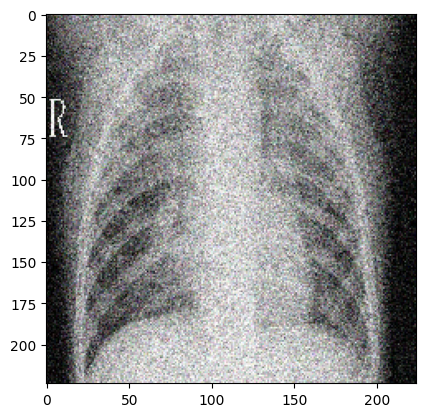

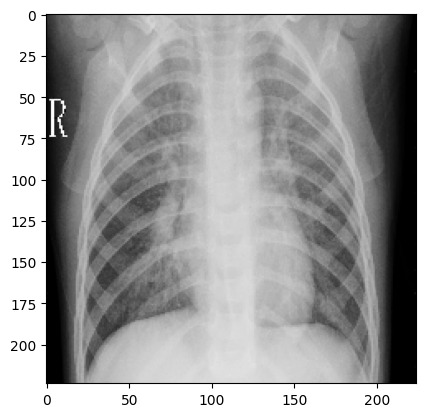

In [20]:
imgN = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img0.jpeg",target_size=(224,224))
imgN = image.img_to_array(imgN)
imgN /= 255.0

img1 = image.load_img(destTrain+"/"+"img0.jpeg",target_size=(224,224))
img1 = image.img_to_array(img1)
img1 /= 255.0

plt.imshow(imgN)
plt.show()
plt.imshow(img1)
plt.show()

In [21]:
img1.shape

(224, 224, 3)

In [22]:
imgN.shape

(224, 224, 3)

## Data Gen

In [23]:
import os
import numpy as np
import skimage
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import Progbar
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

def datagen(noisy_folder, original_folder, batch_size=32, img_size=(224, 224)):
    noisy_images = sorted(os.listdir(noisy_folder))
    original_images = sorted(os.listdir(original_folder))

    # Verify that we have the same number of images in both folders
    assert len(noisy_images) == len(original_images), \
        f"Mismatch in number of images: {len(noisy_images)} noisy images and {len(original_images)} original images."

    while True:
        batch_noisy = []
        batch_original = []

        for i in range(batch_size):
            idx = np.random.randint(0, len(noisy_images))

            # Load the noisy and original images
            noisy_img = image.load_img(os.path.join(noisy_folder, noisy_images[idx]), target_size=img_size, color_mode="grayscale")
            noisy_img = image.img_to_array(noisy_img) / 255.0

            original_img = image.load_img(os.path.join(original_folder, original_images[idx]), target_size=img_size, color_mode="grayscale")
            original_img = image.img_to_array(original_img) / 255.0

            batch_noisy.append(noisy_img)
            batch_original.append(original_img)

        yield (np.array(batch_noisy), np.array(batch_original))


In [25]:
# Paths to noisy and original folders for train, validation, and test sets
train_noisy_path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN"
train_original_path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainO"

val_noisy_path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN"
val_original_path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valO"

test_noisy_path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN"
test_original_path = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO"

# Create data generators
train_generator = datagen(train_noisy_path, train_original_path, batch_size=32)
val_generator = datagen(val_noisy_path, val_original_path, batch_size=32)
test_generator = datagen(test_noisy_path, test_original_path, batch_size=1)


## RDN MODEL

In [26]:
from tensorflow.keras.layers import Input, Conv2D, Add, Concatenate, ReLU
from tensorflow.keras.models import Model

# Residual Dense Block (RDB)
def residual_dense_block(x, growth_rate, num_layers=4):
    layers = [x]
    for i in range(num_layers):
        x = Conv2D(growth_rate, (3, 3), padding='same')(Concatenate()(layers))
        x = ReLU()(x)
        layers.append(x)
    # Local Feature Fusion
    x = Conv2D(growth_rate, (1, 1), padding='same')(Concatenate()(layers))
    return Add()([layers[0], x])

# Residual Dense Network (RDN)
def build_rdn(input_shape=(224, 224, 1), num_rdb=6, growth_rate=64):
    inputs = Input(shape=input_shape)

    # shallow feature extract
    sfe1 = Conv2D(growth_rate, (3, 3), padding='same')(inputs)
    sfe2 = Conv2D(growth_rate, (3, 3), padding='same')(sfe1)

    # RDN blocks
    x = sfe2
    rdb_outputs = []
    for _ in range(num_rdb):
        x = residual_dense_block(x, growth_rate=growth_rate)
        rdb_outputs.append(x)

    # Feature fusion
    x = Concatenate()(rdb_outputs)
    x = Conv2D(growth_rate, (1, 1), padding='same')(x)
    x = Conv2D(growth_rate, (3, 3), padding='same')(x)

    # LR rate
    outputs = Add()([sfe1, x])
    outputs = Conv2D(1, (3, 3), padding='same')(outputs)

    return Model(inputs, outputs)

# compile
model = build_rdn()
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 224, 224, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 224, 224, 64)   │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 224, 224, 64)   │         36,928 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 224, 224, 64)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 224, 224, 128)  │              0 │ conv2d_1[0][0],        │
│ (Concatenate)             │                        │                │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 224, 224, 64)   │         73,792 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 224, 224, 64)   │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 224, 224, 192)  │              0 │ conv2d_1[0][0],        │
│ (Concatenate)             │                        │                │ re_lu[0][0],           │
│                           │                        │                │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 224, 224, 64)   │        110,656 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 224, 224, 64)   │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 224, 224, 256)  │              0 │ conv2d_1[0][0],        │
│ (Concatenate)             │                        │                │ re_lu[0][0],           │
│                           │                        │                │ re_lu_1[0][0],         │
│                           │                        │                │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 224, 224, 64)   │        147,520 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 224, 224, 64)   │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 224, 224, 320)  │              0 │ conv2d_1[0][0],        │
│ (Concatenate)             │                        │                │ re_lu[0][0],           │
│                      

 Total params: 2,436,353 (9.29 MB)

 Trainable params: 2,436,353 (9.29 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras import mixed_precision

# Enable mixed precision for less meomery
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Reduce batch size and image size
batch_size = 8
img_size = (224, 224)

# Create data generators
train_generator = datagen(train_noisy_path, train_original_path, batch_size=batch_size, img_size=img_size)
val_generator = datagen(val_noisy_path, val_original_path, batch_size=batch_size, img_size=img_size)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(os.listdir(train_noisy_path)) // batch_size,
    validation_data=val_generator,
    validation_steps=len(os.listdir(val_noisy_path)) // batch_size,
    epochs=20
)


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - loss: 0.9259 - mean_squared_error: 8.7087 - val_loss: 0.0327 - val_mean_squared_error: 0.0020
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - loss: 0.0272 - mean_squared_error: 0.0014 - val_loss: 0.0240 - val_mean_squared_error: 0.0011
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - loss: 0.0256 - mean_squared_error: 0.0012 - val_loss: 0.0227 - val_mean_squared_error: 9.9240e-04
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - loss: 0.0242 - mean_squared_error: 0.0011 - val_loss: 0.0225 - val_mean_squared_error: 9.6122e-04
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - loss: 0.0230 - mean_squared_error: 9.8911e-04 - val_loss: 0.0232 - val_mean_squared_error: 9.9943e-04
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - loss: 0.0234 - mean_squared_error: 0.0010 - val_loss: 0.0221 - val_mean_squared_error: 9.1248e-04
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - loss: 0.0225 - mean_squared_err

200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.0211 - mean_squared_error: 8.4050e-04
Test Loss: 0.021024513989686966, Test MSE: 0.0008363822707906365
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


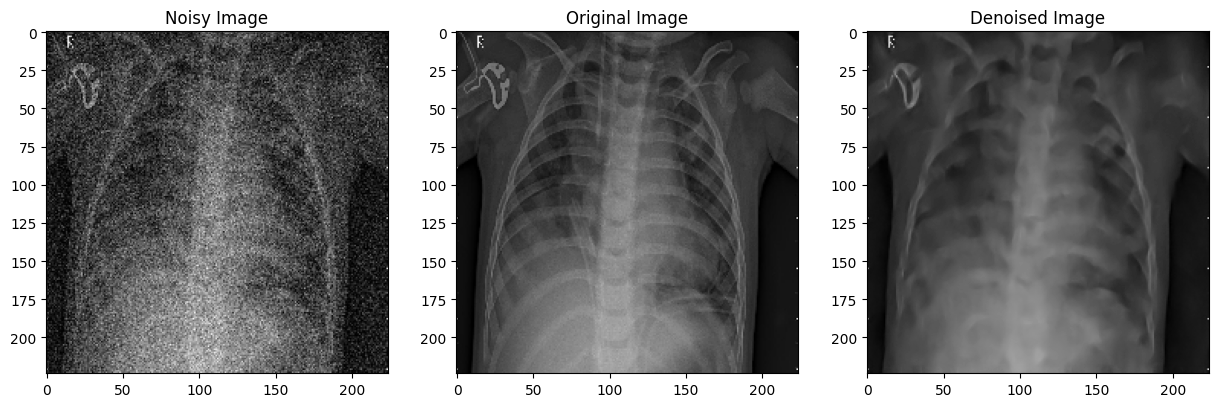

In [28]:
# testing on test set
test_loss, test_mse = model.evaluate(test_generator, steps=len(os.listdir(test_noisy_path)))
print(f"Test Loss: {test_loss}, Test MSE: {test_mse}")

# single image example
import matplotlib.pyplot as plt

def show_denoised_result(model, noisy_image, clean_image):
    denoised_image = model.predict(np.expand_dims(noisy_image, axis=0))[0]
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(noisy_image.squeeze(), cmap='gray')
    ax[0].set_title("Noisy Image")
    ax[1].imshow(clean_image.squeeze(), cmap='gray')
    ax[1].set_title("Original Image")
    ax[2].imshow(denoised_image.squeeze(), cmap='gray')
    ax[2].set_title("Denoised Image")
    plt.show()

# Visualize on a random test image
test_noisy_img, test_clean_img = next(test_generator)
show_denoised_result(model, test_noisy_img[0], test_clean_img[0])
